In [ ]:
from pathlib import Path
import duckdb, pandas as pd
import matplotlib.pyplot as plt
import numpy as np
db_path = (Path.cwd().parent / "pl.duckdb") 
con = duckdb.connect(str(db_path))         


In [4]:
csv_path = Path.cwd().parent / "data" / "football_matches.csv"

con.execute(f"""
    CREATE OR REPLACE TABLE matches AS
    SELECT * FROM read_csv_auto('{csv_path.as_posix()}', HEADER=TRUE);
""")

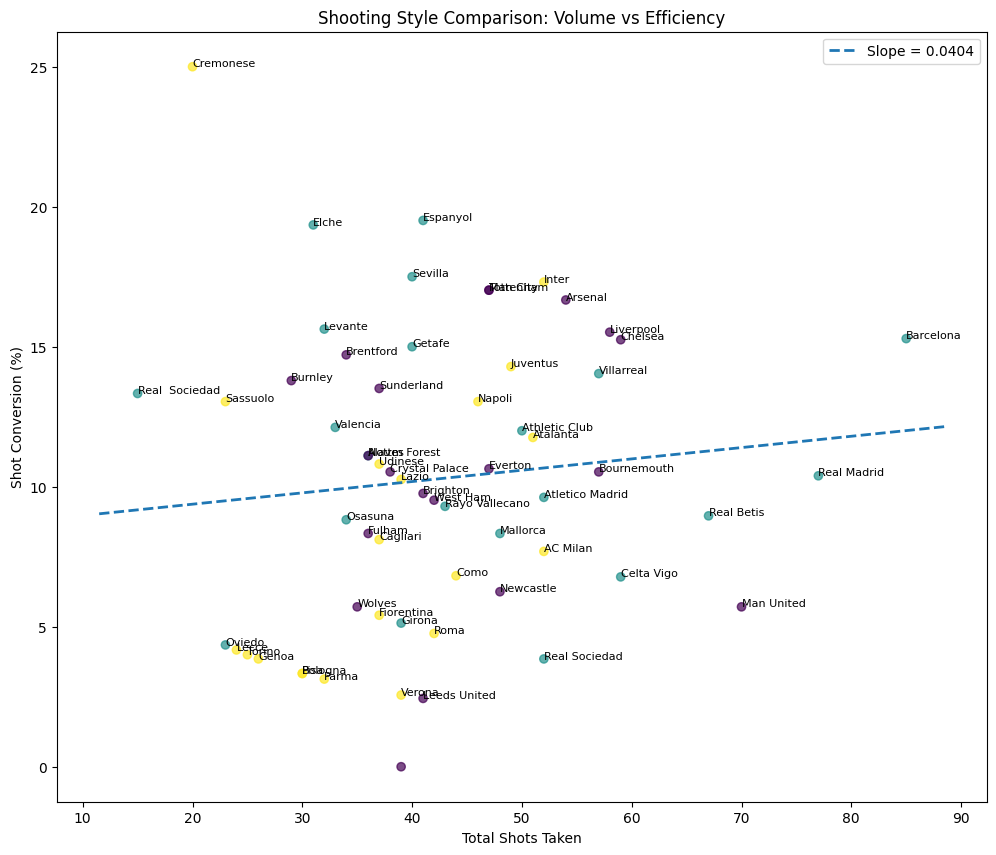

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))

x = df['shots'].to_numpy()
y = df['conversion_pct'].to_numpy()
colors = pd.factorize(df['League'])[0]
ax.scatter(x, y, c=colors, alpha=0.7)

ax.set_xlabel("Total Shots Taken")
ax.set_ylabel("Shot Conversion (%)")
ax.set_title("Shooting Style Comparison: Volume vs Efficiency")

all = df.sort_values('conversion_pct', ascending=False).head(60)
for _, row in all.iterrows():
    ax.text(row['shots'], row['conversion_pct'], row['team'], fontsize=8)

m, b = np.polyfit(x, y, 1)

x_min, x_max = ax.get_xlim()
x_line = np.linspace(x_min, x_max, 200)
ax.plot(x_line, m * x_line + b, linestyle='--', linewidth=2, label=f"Slope = {m:.4f}")

ax.legend(loc='best')

fig.savefig("../figures/shooting_style_comparison.png", dpi=300, bbox_inches="tight")
plt.show()